In [1]:
from sympy import *
init_session(quiet = True)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Aproximación de soluciones de SEL mediante métodos númericos

En el presente cuaderno de Jupyter se realizará un acercamiento a 3 métodos para aproximar soluciones a sistemas de ecuaciones lineales heterogéneos. Estaremos usando el sistema de ecuaciones lineales:

$$4x_{1}−x_{2}−x_{4}=0$$

$$−x_{1}+4x_{2}−x_{3}−x_{5}=5$$

$$−x_{2}+4x_{3}−x_{6}=0$$

$$−x_{1}+4x_{4}−x_{5}=6$$

$$−x_{2}−x_{4}+4x_{5}−x_{6}=−2$$

$$−x_{3}−x_{5}+4x_{6}=6$$

# Sobre la bibliografía

Toda la teoría aquí presentada se sustena en el libro Numerical Methods for Engineers: With Software and Programming Applications por Steven C. Chapra, Raymond P. Canale, el cual es la bibliografía presentada en el PDF de la actividad.

# Almacenando el SEL en una matriz

Con la ayuda de los objetos $Matrix$ de la libreria Sympy, almacenaremos el sistema de ecuaciones lineales en una matriz, de manera que sea más comodo trabajar con el sistema.

In [2]:
SEL = Matrix([[ 4, -1,  0, -1,  0,  0, 0],
              [-1,  4, -1,  0, -1,  0, 5],
              [ 0, -1,  4,  0,  0, -1, 0],
              [-1,  0,  0,  4, -1,  0, 6],
              [ 0, -1,  0, -1,  4, -1,-2],
              [ 0,  0, -1,  0, -1,  4, 6]])
SEL

⎡4   -1  0   -1  0   0   0 ⎤
⎢                          ⎥
⎢-1  4   -1  0   -1  0   5 ⎥
⎢                          ⎥
⎢0   -1  4   0   0   -1  0 ⎥
⎢                          ⎥
⎢-1  0   0   4   -1  0   6 ⎥
⎢                          ⎥
⎢0   -1  0   -1  4   -1  -2⎥
⎢                          ⎥
⎣0   0   -1  0   -1  4   6 ⎦

# Obteniendo la matriz $A$

Primero, obtenemos la matriz de coeficientes usando las propiedades de 'slicing' de la libreria Sympy.

In [3]:
A = SEL[:, :-1]
print('Matriz A: ')
A

Matriz A: 


⎡4   -1  0   -1  0   0 ⎤
⎢                      ⎥
⎢-1  4   -1  0   -1  0 ⎥
⎢                      ⎥
⎢0   -1  4   0   0   -1⎥
⎢                      ⎥
⎢-1  0   0   4   -1  0 ⎥
⎢                      ⎥
⎢0   -1  0   -1  4   -1⎥
⎢                      ⎥
⎣0   0   -1  0   -1  4 ⎦

# Obteniendo el vector $b$

Ahora, obtendremos el vector $b$ correspondiente al sistema de ecuaciones lineales. También usaremos las propiedades de slicing de la libreria Sympy.

In [4]:
b = SEL[:, -1]
print('Vector b: ')
b

Vector b: 


⎡0 ⎤
⎢  ⎥
⎢5 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎢-2⎥
⎢  ⎥
⎣6 ⎦

# Evaluación del determinante de la matriz

In [5]:
print('Determinante del sistema de ecuaciones:', A.det())

Determinante del sistema de ecuaciones: 2415


# El sistema tiene una solución única

Dado que al evaluar el determinante del SEL, se llegó a que este es distinto de 0, podemos afirmar que este tiene una única solución. Esto se sustenta en el hecho de que todas las filas son linealmente independientes entre sí, y por lo tanto, cada una es un vector para una base en $R^6$.

# Criterios de convergencia

Para determinar si los métodos de aproximación convergen, primero debemos verificar que la matriz sea diagonalmente dominante. 

In [6]:
def dd(X):
    D = np.diag(np.abs(X)) # Encontrar coeficientes de la diagonal
    S = np.sum(np.abs(X), axis=1) - D # Encontrar suma de las filas sin la diagonal
    if np.all(D > S):
        print('La matriz es diagonalmente dominante')
    else:
        print('La matriz no es diagonalmente dominante')
    return

dd(SEL)

La matriz no es diagonalmente dominante


Sin embargo, el hecho de que la matriz dada por el SEL no sea Diagonalmente Dominante, no necesariamente implica que el método no converja. Así pues, debemos ahora aplicar otro criterio de convergencia distinto. El siguiente criterio de convergencia que aplicaremos será hallar el radio espectral de la matriz, el cual no es más que el valor absoluto mas grande de sus autovalores. Para calcular estos autovalores, usaremos métodos de la libreria numpy

In [7]:
print('Radio espectral de la matriz: ', np.max(np.absolute(np.linalg.eigvals(np.array(A, dtype = float)))))

Radio espectral de la matriz:  6.414213562373098


Vemos que el radio espectral de la matriz no cumple con el criterio de convergencia. Sin embargo, como vamos a ver más adelante, todos los métodos convergen. ¿A que se debe esto?: Muy sencillo, si reordenamos las filas del sistema de ecuaciones lineales, podremos llegar a una ordenación en la cual si se cumple el criterio de convergencia. Sin embargo, probar todas las posibilidades es computacionalmente costoso (se debe realizar un total de $6!$ factorial comprobaciones), por lo tanto, a partir de ahora vamos a suponer que los criterios si cumplen, pero para una ordenación distinta de la matriz.

# Método de Gauss - Seidel

El primer método que vamos a explorar será el método de Gauss - Seidel. Este método consiste en despejar los valores de $x_{i}$ de la diagonal. Después, establecer una aproximación inicial, y a partir de esta empezar a iterar a través de los distintos valores que se van obteniendo cada vez que se reemplazan las variables por sus respectivos valores. Utilizaremos una norma de Frobbenius.



# Despejamos cada una de las variables de la diagonal principal

Primero, debemos despejar cada uno de los valores de $x_{i}$ correspondientes a la diagonal principal. El caso en el que en la ecuación $i$ no encuentre el término $x_{i}$, la intercambiaremos con otra que si lo tenga. Obtenemos:

$$x_{1} = \dfrac{x_{2} + x_{4}}{4} $$

$$x_{2} = \dfrac{x_{1} + x_{3} + x_{5} + 5}{4} $$

$$x_{3} = \dfrac{x_{2} + x_{6}}{4} $$

$$x_{4} = \dfrac{x_{1} + x_{5} + 6}{4}$$


$$x_{5} = \dfrac{x_{2} + x_{4} + x_{6} - 2}{4}$$

$$x_{6} = \dfrac{x_{3} + x_{5} + 6}{4}$$

# Descripción del algoritmo

Primero debemos de elegir un valor inicial para $x_{i}$. En este caso, para todo $i$, $x_{i} = 0$. En particular, $x_{1} = 0$, $x_{2} = 0$, etc. Luego, el algoritmo consistira en ir reemplazando los respectivos valores de $x_{i}$ en cada uno de las ecuaciones. En cada iteración, cada $x_{i}$ se acercará a su respectiva solución. Ya que se trata de un SEL heterogéneo, podemos estar seguros que el algoritmo no se estancará en el valor $0$.

In [8]:
_x = {}

for i in range(1, 7):
    _x[str(i)] = i

error = 1

i = 1

E = []
I = []
    
while(error > 10e-6):

    _x_anterior = np.array(list(_x.items()), dtype = float)[:, 1]
    
    _x['1'] = (_x['2'] + _x['4']) / 4
    _x['2'] = (_x['1'] + _x['3'] + _x['5'] + 5) / 4
    _x['3'] = (_x['2'] + _x['6']) / 4
    _x['4'] = (_x['1'] + _x['5'] + 6) / 4
    _x['5'] = (_x['2'] + _x['4'] + _x['6'] - 2) / 4
    _x['6'] = (_x['3'] + _x['5'] + 6) / 4
    
    _x_actual  = np.array(list(_x.items()), dtype = float)[:, 1]
    error = np.linalg.norm(_x_actual - _x_anterior)
    
    i += 1
    
    E.append(float(error))
    I.append(i)

E = np.array(E)
I = np.array(I)    
    
print('Valores del vector x: \n')
    
for i in range(1, 7):
    print(_x[f'{i}'])

Valores del vector x: 

1.0000022276598879
2.000001901426651
1.0000008114845822
2.0000013445116784
1.000001147612502
2.000000489774271


# Gráfica del error con respecto a las iteraciones (Gauss - Seidel)

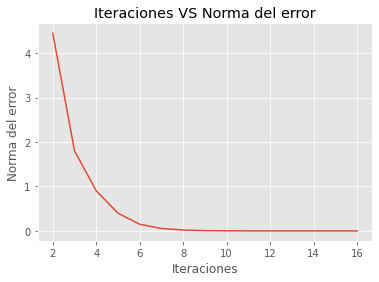

In [9]:
plt.style.use('ggplot')
plt.title('Iteraciones VS Norma del error')
plt.xlabel('Iteraciones')
plt.ylabel('Norma del error')
plt.plot(I, E)
plt.show()

Comprobamos del gráfico anterior como la norma del error va decreciendo a medida que se realizan las iteraciones. Observamos que en tan solo 10 iteraciones, ya se logra una norma tal que $|A|<10^{-6}$. Además, comprobamos que el vector resultante $x$ es solución del SEL:

In [10]:
A = SEL[:, :-1]
x = np.array(list(_x.items()), dtype = float)[:, 1]
x = np.round(x, 2)
x = Matrix(x)
A*x

⎡ 0  ⎤
⎢    ⎥
⎢5.0 ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢6.0 ⎥
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣6.0 ⎦

# Método de Jacobi

Ahora, utilizaremos el método de Jacobi para calcular los valores de $x_{i}$. Primero, debemos expresar la matriz $A$ de la siguiente forma:

$$A = D - L - U, $$

donde $D$ es una matriz diagonal, $L$ es una matriz triangular inferior y $U$ es una matriz triangular superior. Lo haremos usando la libreria numpy.

In [11]:
D = Matrix(np.diag(np.diag(A)))
L = Matrix(np.tril(A) - D)
U = Matrix(np.triu(A) - D)

R = L + U

D_inv = D.inv()

# Descripción del algoritmo

En este método, se itera en el vector $x$. Luego, la iteración $k + 1$ sobre el vector $x$ está definida como:

$$x^{k+1} = D^{-1}(b - Rx^{k}),$$
        
donde $R = (L + U)$. Usaremos las herramientas de numpy y de sympy para realizar los cálculos matriciales. 

Dado que debemos dar una aproximación inicial para el vector $x$, haremos que todos los valores sean 0. A partir de ahí, empezará el algoritmo a iterar, basándose en la fórmula anterior.

In [12]:
x = Matrix(np.zeros((6, 1)))

E = []
I = []

error = 1

while(error > 10e-6):
    
    x_anterior = np.array(x, dtype = float)
    
    x = D_inv * (b - R*x)
    
    x_actual = np.array(x, dtype = float)
    
    error = np.linalg.norm(x_actual - x_anterior)
    
    i += 1
    
    E.append(float(error))
    I.append(i)


In [13]:
x = np.round(np.array(x, dtype = float), 3)

print('Valores del vector x: ')
x

Valores del vector x: 


array([[1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.]])

# Gráfica del error con respecto a las iteraciones (Jacobi)

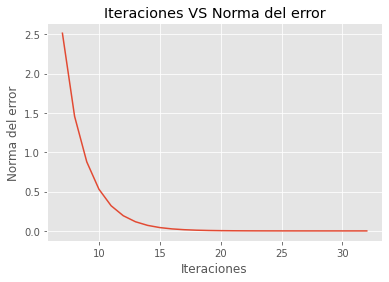

In [14]:
plt.style.use('ggplot')
plt.title('Iteraciones VS Norma del error')
plt.xlabel('Iteraciones')
plt.ylabel('Norma del error')
plt.plot(I, E)
plt.show()

# Sobre la velocidad de convergencia del método de Jacobi

Luego de realizar alrededor de 35, llegamos a la convergencia para el método de Jacobi. Por lo tanto, facilmente comprobamos que el método de Jacobi también converge a una solución para el SEL, pero sin embargo, converge de forma más lenta que el método de Gauss - Seidel. Esto es debido a que mientras que el método de Gauss - Seidel usa los valores ya previamente calculados, en el método de Jacobi se han de volver a calcular por completo todas las entradas del vector $x$, lo cual ralentiza  la velocidad de convergencia.

In [15]:
np.round(np.array(A*x, dtype = float), 4)

array([[ 0.],
       [ 5.],
       [ 0.],
       [ 6.],
       [-2.],
       [ 6.]])

# Método SOR

Ahora, usaremos el método SOR para resolver el SEL. El método SOR es muy parecido al método de Gauss - Seidel, con la única diferencia en que luego de calcular $x_{i}$, lo "modificaremos" con un parámetro de relajación $w$, mediante la siguiente fórmula:


$$x_{i + 1} = wx_{i} + (1 - w)x_{i} $$

# Descripción del algoritmo

La descripción de este método es la misma que la de el método de Gauss - Seidel: Despejamos las variables, establecemos un valor inicial y vamos iterando a partir de este valor inicial cada uno de los valores de $x_{i}$. Sin embargo, dado que estamos trabajando con el método SOR, calcularemos también $x_{i}$ modificado con su respectivo parámetro de relajación. Para este caso, usaremos un parámetro de relajación $w = 4$.

# Sobre el parámetro de relajación 

La justificación para la elección de este parámetro de relajación, es que dado que el método de Gauss - Seidel está convergiendo, no es necesario tomar el parámetro en modo de sub - relajación (ya que este se usa cuando Gauss -Seidel no converge). Por lo tanto, usaremos un parámetro que se encuentra en $1$ y $2$. En consecuencia, $1 < w < 2$.

In [23]:
_x = {}

w = 1.5 # parámetro de relajación

j = 1

for i in range(1, 7):
    _x[str(i)] = i

error = 1

i = 1

E = []
I = []
    

while(error > 10e-6): 
    
    _x_anterior = np.array(list(_x.items()), dtype = float)[:, 1]

    _x['1'] = (_x['2'] + _x['4']) / 4
    
    _x[str(j)] = _x[str(j)] * w + (1 - w) * _x[str(j)]
    j += 1
    
    _x['2'] = (_x['1'] + _x['3'] + _x['5'] + 5) / 4
    
    _x[str(j)] = _x[str(j)] * w + (1 - w) * _x[str(j)]
    j += 1
    
    _x['3'] = (_x['2'] + _x['6']) / 4
    
    _x[str(j)] = _x[str(j)] * w + (1 - w) * _x[str(j)]
    j += 1
    
    _x['4'] = (_x['1'] + _x['5'] + 6) / 4
    
    _x[str(j)] = _x[str(j)] * w + (1 - w) * _x[str(j)]
    j += 1
    
    _x['5'] = (_x['2'] + _x['4'] + _x['6'] - 2) / 4
    
    _x[str(j)] = _x[str(j)] * w + (1 - w) * _x[str(j)]
    j += 1
    
    _x['6'] = (_x['3'] + _x['5'] + 6) / 4
    
    _x[str(j)] = _x[str(j)] * w + (1 - w) * _x[str(j)]
    j = 1
    
    _x_actual  = np.array(list(_x.items()), dtype = float)[:, 1]
    
    error = np.linalg.norm(_x_actual - _x_anterior)
    
    i += 1
    
    E.append(float(error))
    I.append(i)

E = np.array(E)
I = np.array(I)    

print('Valores del vector x: \n')
    
for i in range(1, 7):
    print(_x[f'{i}'])

Valores del vector x: 

1.000002227659888
2.000001901426651
1.0000008114845822
2.000001344511678
1.0000011476125015
2.000000489774271


Comprobamos que el vector anterior es solución para el SEL:

In [24]:
A = SEL[:, :-1]
x = np.array(list(_x.items()), dtype = float)[:, 1]
x = np.round(x, 2)
x = Matrix(x)
A*x

⎡ 0  ⎤
⎢    ⎥
⎢5.0 ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢6.0 ⎥
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣6.0 ⎦

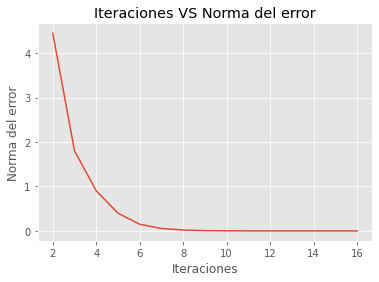

In [25]:
plt.style.use('ggplot')
plt.title('Iteraciones VS Norma del error')
plt.xlabel('Iteraciones')
plt.ylabel('Norma del error')
plt.plot(I, E)
plt.show()

# Sobre la convergencia del método SOR

Vemos que solo se necesitan $16$ iteraciones para el método, ya que hemos elegido un parámetro de relajación adecuado, por lo que hemos optmizado satisfactoriamente el método de Gauss - Seidel.

# Conclusiones

Basándonos en los resultados anteriores, podemos concluir el método SOR es el que ha dado un mejor rendimiento a la hora de converger a una solución para el SEL. Esto claramente se sustenta en el hecho de el método SOR no es más que una versión optimizada del método de Gauss - Seidel, y que en el método de Jacobi se necesita calcular todo un conjunto nuevo de variables, mientras que en los otros dos métodos se usan los valores ya calculados. 



# Link del vídeo 

https://youtu.be/OTz-y-sZ34A